Loading the required packages

In [2]:
library(dplyr)
library(ggplot2)
library(cluster)
library(fpc)

Reading the data into a dataframe

In [3]:
data<-as.data.frame(read.csv("Desktop/a/June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv",stringsAsFactors=TRUE))

Contents and column names of data

In [3]:
head(data)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


In [4]:
names(data)

[1] "psraid"     "sample"     "int_date"   "lang"       "usr"       
  [6] "cregion"    "state"      "form"       "sex"        "q1"        
 [11] "q3"         "eminuse"    "intmob"     "intfreq"    "home4nw"   
 [16] "bbhome1"    "bbhome2"    "bbhome3a"   "bbhome3b"   "bbhome3c"  
 [21] "bbhome3d"   "bbhome3e"   "device1a"   "smart1"     "q4"        
 [26] "bbsmart1"   "bbsmart2"   "bbsmart3a"  "bbsmart3b"  "bbsmart3c" 
 [31] "bbsmart3d"  "bbsmart3e"  "bbsmart3f"  "bbsmart4"   "cable1"    
 [36] "cable2"     "cable3a"    "cable3b"    "cable3c"    "act19"     
 [41] "act87a"     "act87b"     "act137"     "q5a"        "q5b"       
 [46] "q5c"        "q5d"        "q5e"        "q5f"        "date1a"    
 [51] "date2a"     "date3a"     "date3b"     "date4a"     "date4b"    
 [56] "date4c"     "date4d"     "date4e"     "date4f"     "game1"     
 [61] "game2a"     "game2b"     "game2c"     "game2d"     "game2e"    
 [66] "game2f"     "game3a"     "game3b"     "game4"      "emplnw"    
 [71] "emptype1"   "emptype2"   "emptype3"   "stud"       "job1a"     
 [76] "job1b"      "job1c"      "job1d"      "job1e"      "job1f"     
 [81] "job2"       "job3a"      "job3b"      "job3c"      "job3d"     
 [86] "job3e"      "job3f"      "job3g"      "job3h"      "job4"      
 [91] "smjob1"     "smjob2a"    "smjob2b"    "smjob2c"    "smjob2d"   
 [96] "smjob2e"    "smjob3"     "smjob4a"    "smjob4b"    "smjob4c"   
[101] "smjob4d"    "smjob4e"    "snsjob1a"   "snsjob1b"   "snsjob1c"  
[106] "snsjob2a"   "snsjob2b"   "job5a"      "job5b"      "job5c"     
[111] "job5d"      "auto1a"     "auto1b"     "auto1c"     "auto1d"    
[116] "auto1e"     "auto2"      "auto3"      "age"        "marital"   
[121] "hh1"        "par"        "kidage1"    "kidage2"    "kidage3"   
[126] "educ2"      "edinst"     "disa"       "party"      "partyln"   
[131] "ideo"       "hisp"       "birth_hisp" "race"       "inc"       
[136] "ql1a"       "qc1"        "zipcode"    "weight"     "standwt"

Columns to be selected - Age, sex, intfreq, intmob, smart1

In [4]:
data <- select(data,age,sex,smart1,intmob,intfreq,date1a)

Checking the contents of the subset data

In [24]:
head(data)

age,sex,smart1,intmob,intfreq,date1a
47,2,1,1,1,2
63,2,1,1,5,2
86,2,2,2,NA,NA
40,2,1,1,2,2
65,2,NA,2,3,2
69,2,1,1,4,2


Cleaning the data
1) Removing NA
2) Filtering out rows
3) Normalising the data

In [5]:
data <- filter(data, intmob < 3)
data <- filter(data, intfreq < 4)
data <- filter(data, smart1 < 4)
data <- filter(data, date1a < 3)
data <- na.omit(data)
normalized_data = function(x){(x-min(x))/(max(x)-min(x))}
data <- normalized_data(data)

Cleaned data

In [26]:
head(data)

age,sex,smart1,intmob,intfreq,date1a
0.4693878,0.01020408,0.00000000,0.00000000,0.00000000,0.01020408
0.3979592,0.01020408,0.00000000,0.00000000,0.01020408,0.01020408
0.7755102,0.00000000,0.00000000,0.00000000,0.02040816,0.01020408
0.7755102,0.01020408,0.01020408,0.01020408,0.01020408,0.01020408
0.5204082,0.00000000,0.00000000,0.00000000,0.00000000,0.01020408
0.7448980,0.01020408,0.00000000,0.00000000,0.01020408,0.01020408


Making 3 clusters out of the data.

In [11]:
clusters <-kmeans(data,3) 
clusters

K-means clustering with 3 clusters of sizes 465, 426, 495

Cluster means:
        age         sex       smart1       intmob     intfreq      date1a
1 0.4899934 0.005222734 0.0013166557 0.0008119377 0.008953259 0.008646039
2 0.6912666 0.005389480 0.0028504359 0.0022755581 0.011234071 0.009269905
3 0.2742321 0.004473304 0.0007833436 0.0003298289 0.006617192 0.008369408

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    1    2    2    1    2    1    1    2    2    1    2    3    1    2    2 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    3    1    1    2    1    3    2    3    2    2    1    2    1    2    2 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   3    2    1    2    1    2    2    1    2    3    2    1    1    1    3    1 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   2    2    1    2    3    2    2    2    

Interpreting the above clusters

CLUSTER 1 : Middle aged people, who have fewer smart phones but their frequency of usage of internet is high.

CLUSTER 2 : Older people who have the highest ownership of smart phones and also highest frequency of usage of internet.

CLUSTER 3 : Younger people have the least ownership of smart phones but high frequency of internet usage.

In [49]:
dim(data)
summary(data)

[1] 1386    6

      age              sex               smart1             intmob       
 Min.   :0.1735   Min.   :0.000000   Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.3163   1st Qu.:0.000000   1st Qu.:0.000000   1st Qu.:0.00000  
 Median :0.4796   Median :0.000000   Median :0.000000   Median :0.00000  
 Mean   :0.4748   Mean   :0.005006   Mean   :0.001598   Mean   :0.00109  
 3rd Qu.:0.6122   3rd Qu.:0.010204   3rd Qu.:0.000000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :0.010204   Max.   :0.010204   Max.   :0.01020  
    intfreq            date1a        
 Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.00000   1st Qu.:0.010204  
 Median :0.01020   Median :0.010204  
 Mean   :0.00882   Mean   :0.008739  
 3rd Qu.:0.01020   3rd Qu.:0.010204  
 Max.   :0.02041   Max.   :0.010204  

Cluster plots [1]

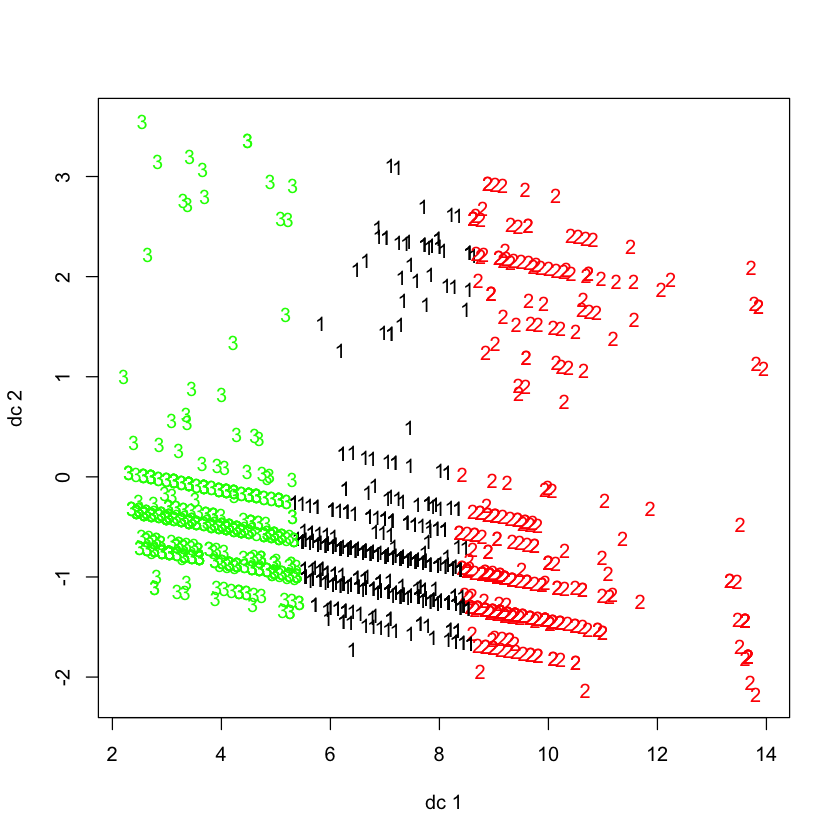

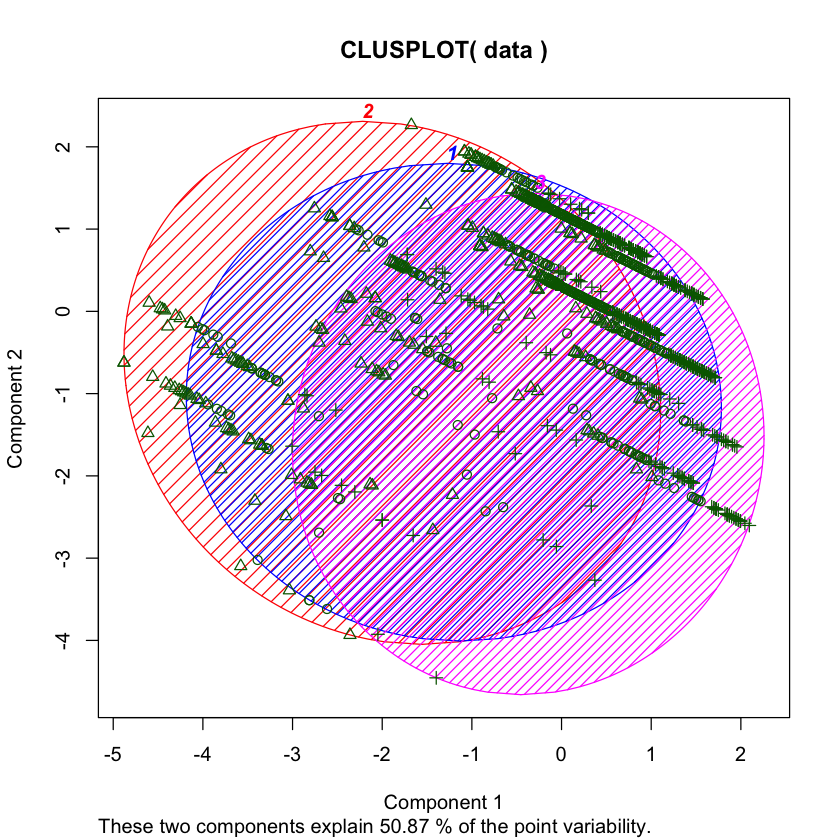

In [16]:
plotcluster(data,clusters$cluster)
clusplot(data,clusters$cluster,color=TRUE, shade=TRUE,lines=2,labels=4)

How ownership of smartphones varies with age.

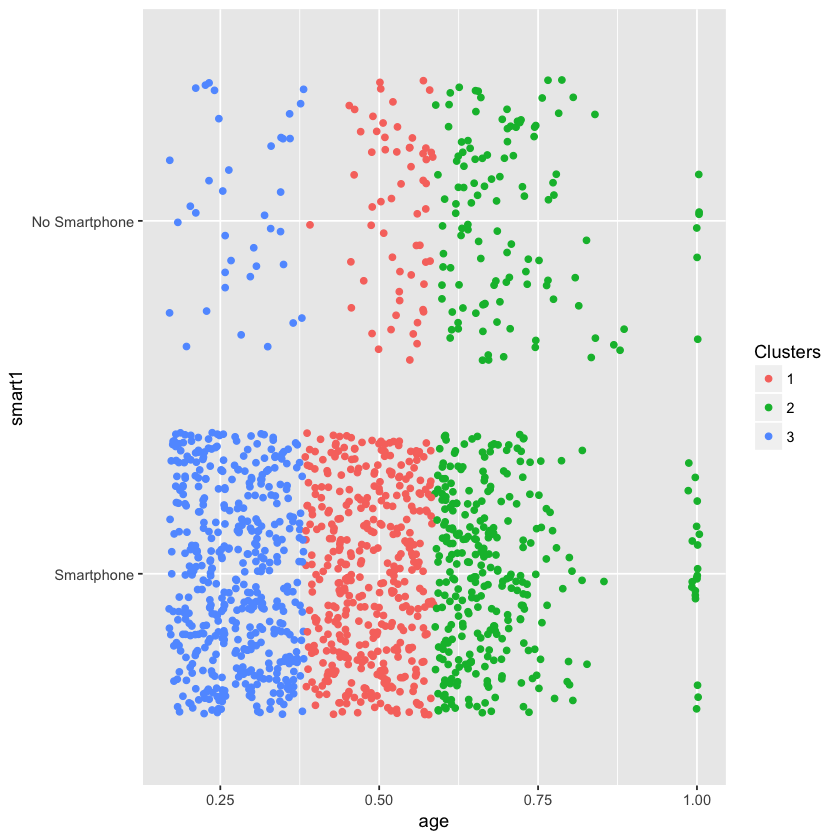

In [33]:
Clusters <- as.factor(clusters$cluster)
data1 <- data
data1 <- within(data1, smart1 <- factor(smart1, labels = c("Smartphone","No Smartphone")))
ggplot(data1, aes(age,smart1,color = Clusters)) + geom_jitter()

How usage of online dating apps varies with age.

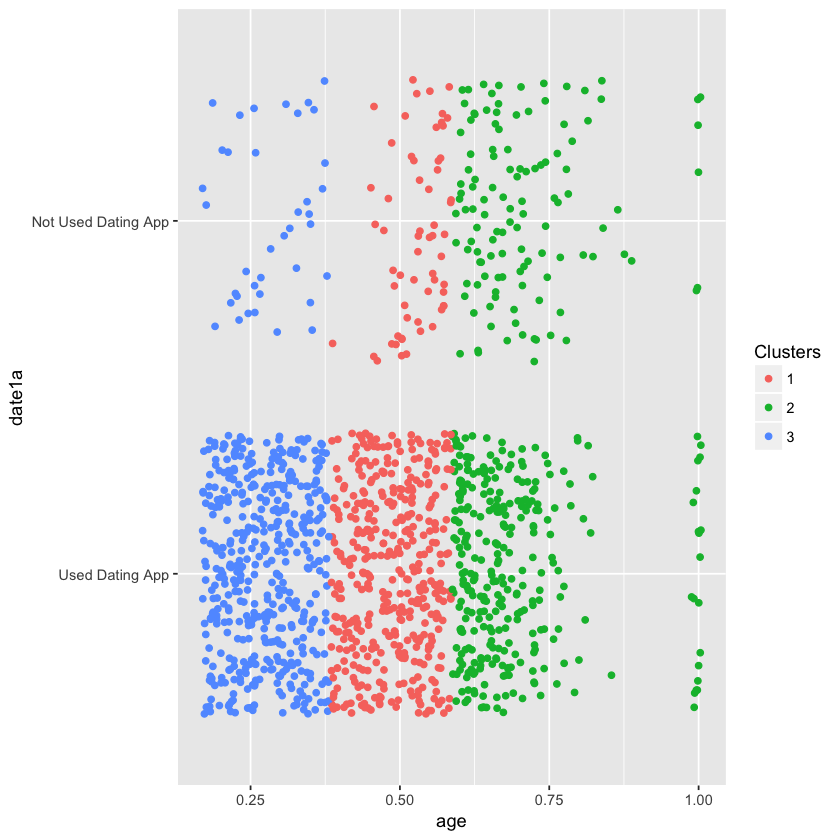

In [35]:
Clusters <- as.factor(clusters$cluster)
data1 <- data
data1 <- within(data1, date1a <- factor(smart1, labels = c("Used Dating App","Not Used Dating App")))
ggplot(data1, aes(age,date1a,color = Clusters)) + geom_jitter()

Frequency of internet usage if there is internet on phone.

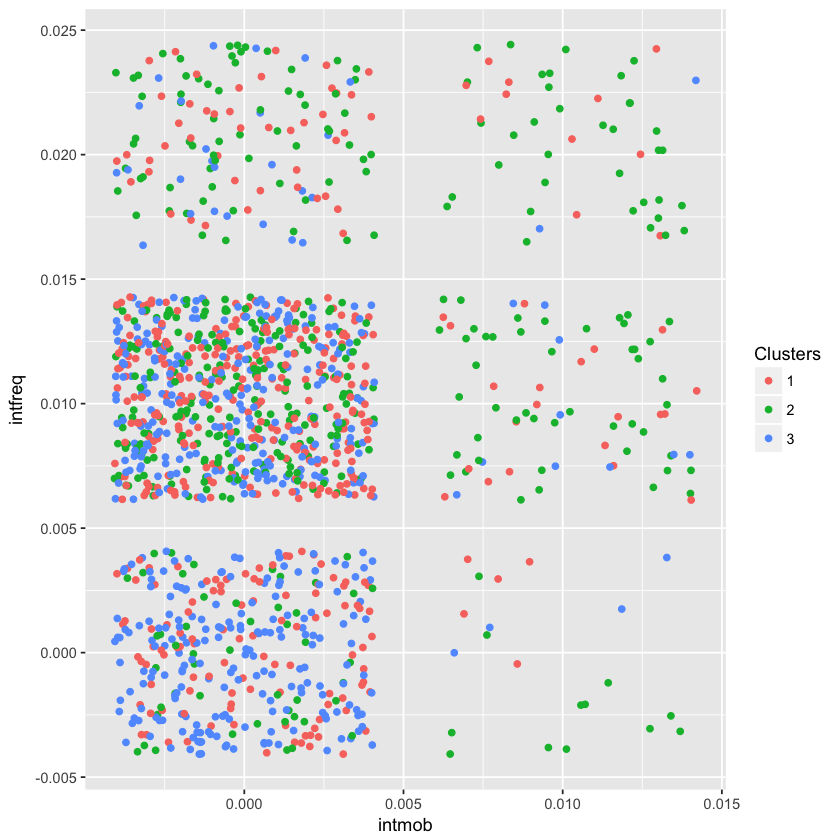

In [12]:
Clusters <- as.factor(clusters$cluster)
data1 <- data
data1 <- within(data1, date1a <- factor(intfreq, labels = c("Daily","Weekly","Monthly")))
ggplot(data1, aes(intmob,intfreq,color = Clusters)) + geom_jitter()

Making 5 clusters out of that data

In [6]:
clusters1 <-kmeans(data,5) 
clusters1

K-means clustering with 5 clusters of sizes 262, 338, 384, 286, 116

Cluster means:
        age         sex       smart1       intmob     intfreq      date1a
1 0.2252298 0.004206263 0.0007399907 0.0003505219 0.006620969 0.008256738
2 0.4871392 0.005071851 0.0011773940 0.0007849294 0.008966308 0.008694602
3 0.6301552 0.005580357 0.0026307398 0.0017803997 0.010629252 0.009061437
4 0.3418724 0.004852291 0.0007135721 0.0002854289 0.006885971 0.008420151
5 0.8159747 0.005102041 0.0035186488 0.0033427164 0.012139338 0.009676284

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   2    4    5    5    2    5    2    2    5    3    3    3    4    4    5    3 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   3    1    2    2    3    2    1    3    1    5    5    2    5    4    3    5 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   4    3    2    3    2    3    3    3    5   

Interpreting the above clusters

CLUSTER 1 : Young generation, who have fewer smart phones but their frequency of usage of internet is high.

CLUSTER 2 : 48 < AGE < 63, High ownership of smart phones, moderate use of dating apps.

CLUSTER 3 : 63 < AGE < 80, Moderate ownership of smart phones and moderate use of dating apps, less usage of internet on smartphones.

CLUSTER 4 : 34 < AGE < 48, Moderate ownership of smart phones and moderate use of dating apps.

CLUSTER 5 : AGE > 80, less ownership of smart phones and less frequency of use of internet.

In [65]:
dim(data)
summary(data)

[1] 1386    6

      age              sex               smart1             intmob       
 Min.   :0.1735   Min.   :0.000000   Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.3163   1st Qu.:0.000000   1st Qu.:0.000000   1st Qu.:0.00000  
 Median :0.4796   Median :0.000000   Median :0.000000   Median :0.00000  
 Mean   :0.4748   Mean   :0.005006   Mean   :0.001598   Mean   :0.00109  
 3rd Qu.:0.6122   3rd Qu.:0.010204   3rd Qu.:0.000000   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :0.010204   Max.   :0.010204   Max.   :0.01020  
    intfreq            date1a        
 Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.00000   1st Qu.:0.010204  
 Median :0.01020   Median :0.010204  
 Mean   :0.00882   Mean   :0.008739  
 3rd Qu.:0.01020   3rd Qu.:0.010204  
 Max.   :0.02041   Max.   :0.010204  

Cluster Plots

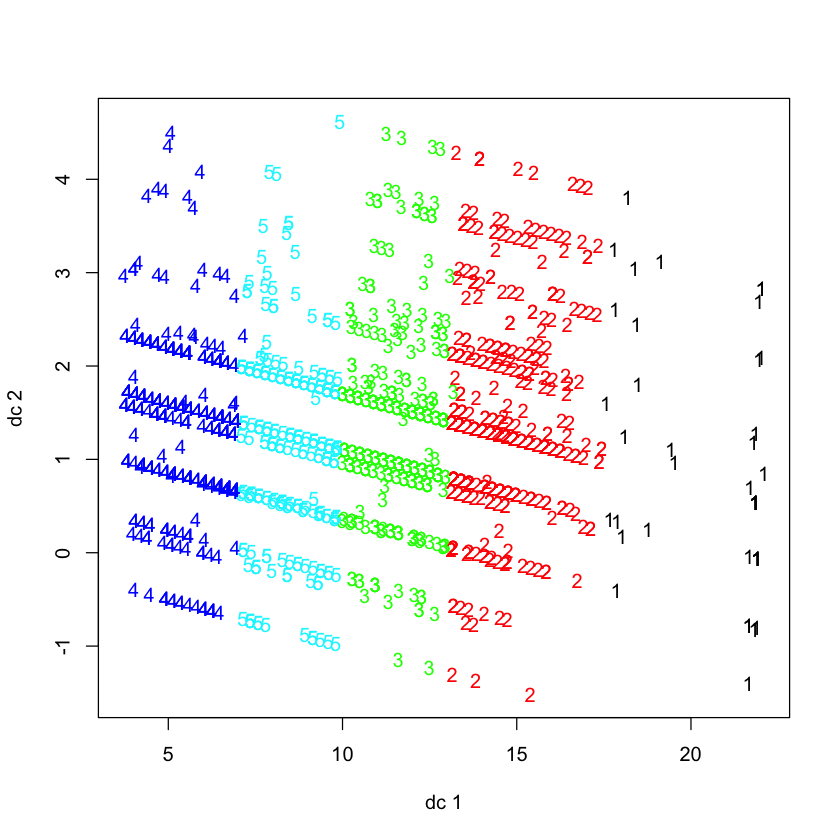

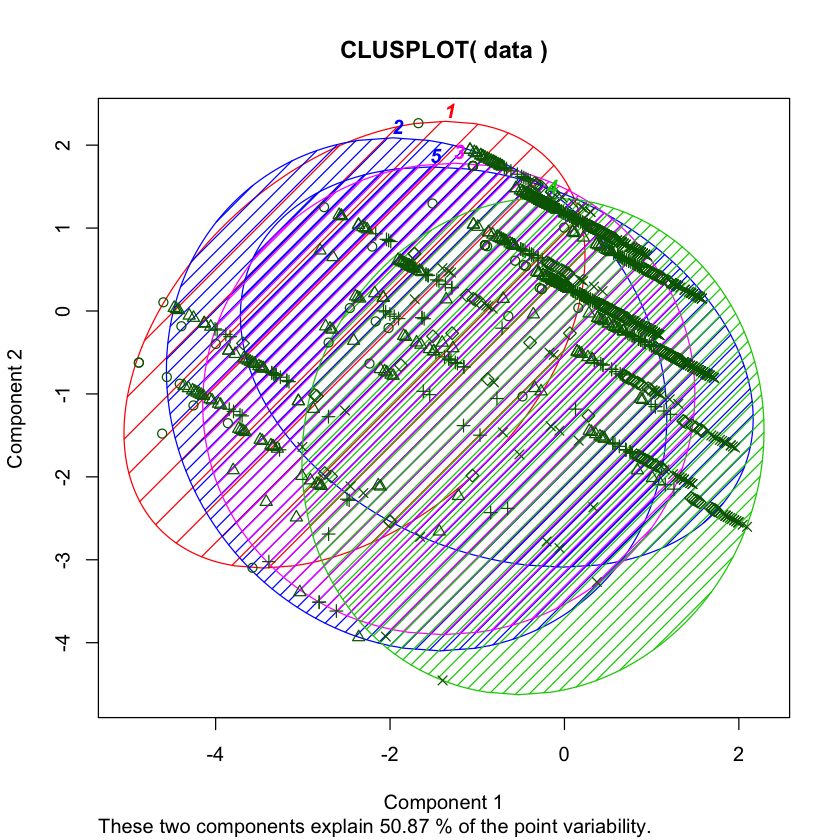

In [66]:
plotcluster(data,clusters1$cluster)
clusplot(data,clusters1$cluster,color=TRUE, shade=TRUE,lines=2,labels=4)

How ownership of smartphones varies with age.

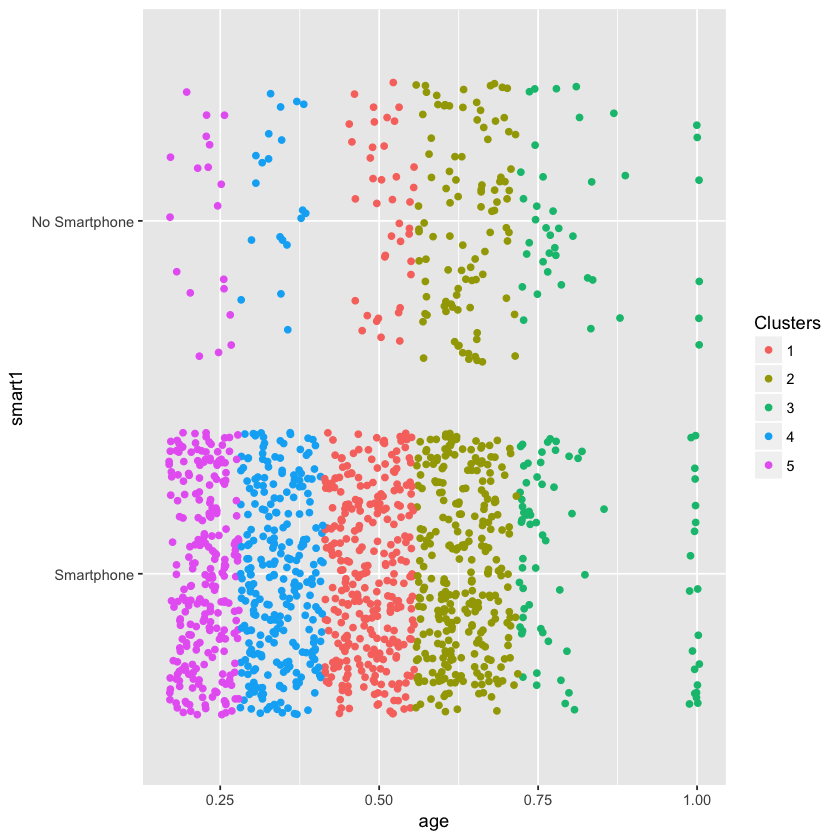

In [19]:
Clusters <- as.factor(clusters1$cluster)
data1 <- data
data1 <- within(data1, smart1 <- factor(smart1, labels = c("Smartphone","No Smartphone")))
ggplot(data1, aes(age,smart1,color = Clusters)) + geom_jitter()

How usage of online dating apps varies with age.

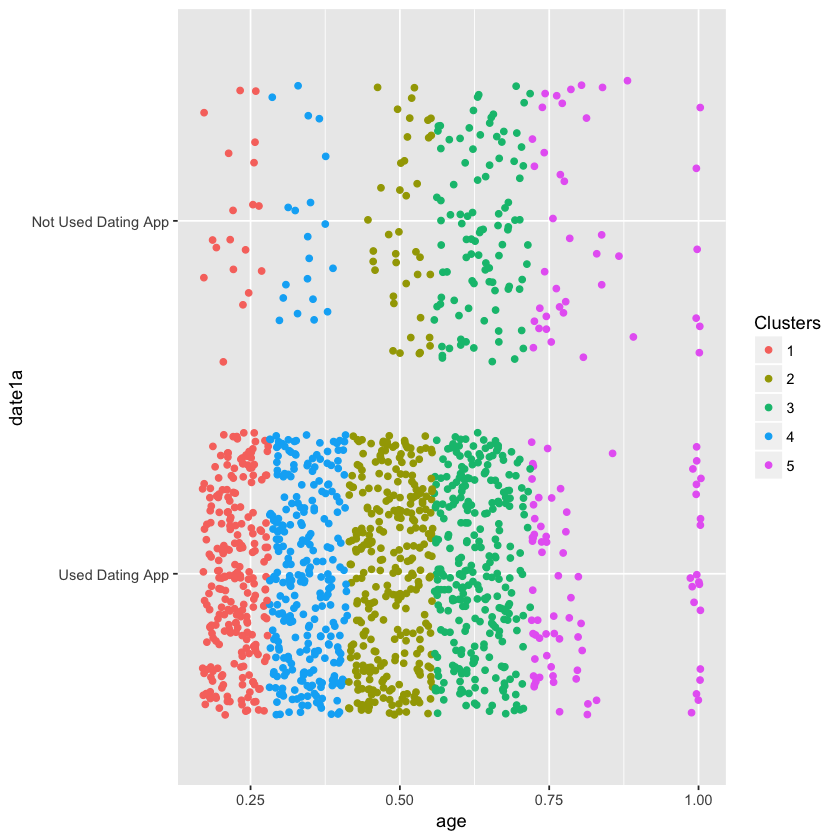

In [7]:
Clusters <- as.factor(clusters1$cluster)
data1 <- data
data1 <- within(data1, date1a <- factor(smart1, labels = c("Used Dating App","Not Used Dating App")))
ggplot(data1, aes(age,date1a,color = Clusters)) + geom_jitter()

Frequency of internet usage if there is internet on phone.

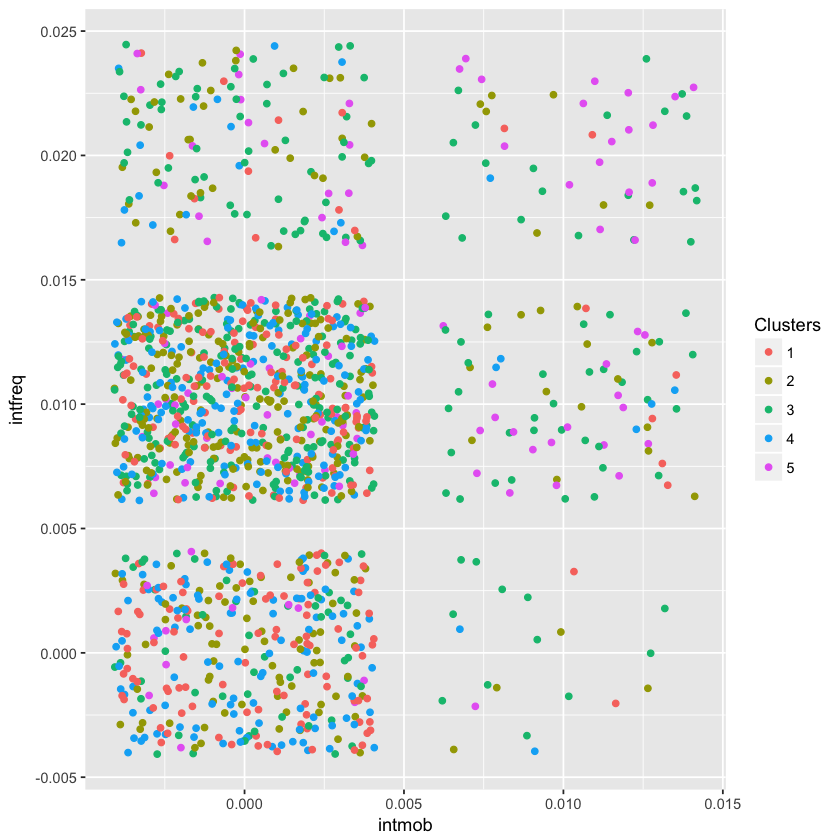

In [9]:
Clusters <- as.factor(clusters1$cluster)
data1 <- data
data1 <- within(data1, date1a <- factor(intfreq, labels = c("Daily","Weekly","Monthly")))
ggplot(data1, aes(intmob,intfreq,color = Clusters)) + geom_jitter()

How usage of internet varies with sex.

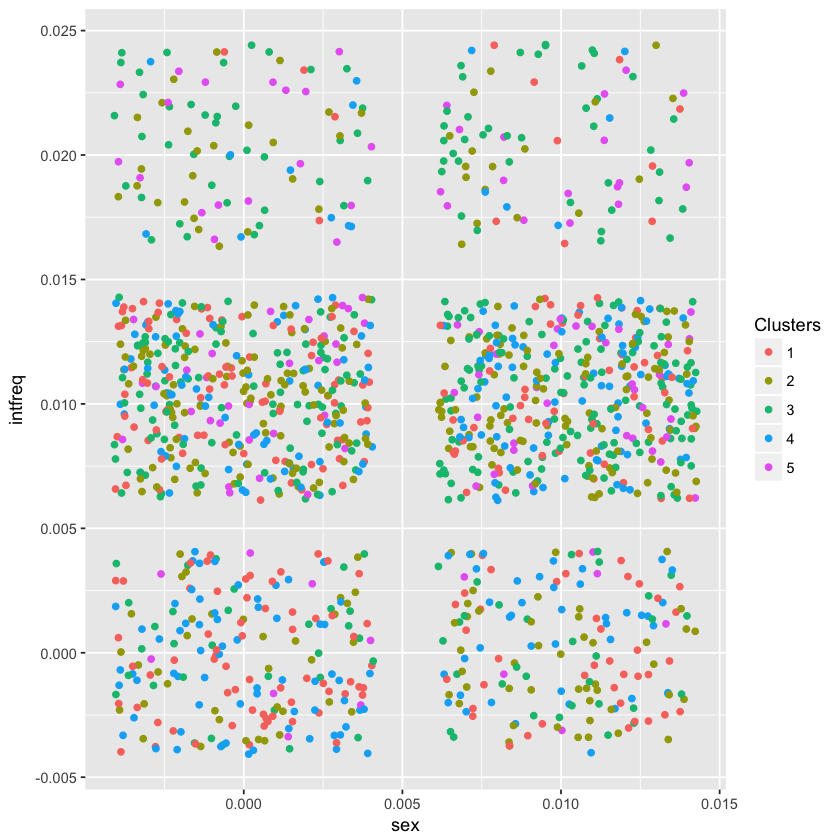

In [13]:
Clusters <- as.factor(clusters1$cluster)
data1 <- data
data1 <- within(data1, date1a <- factor(intfreq, labels = c("Daily","Weekly","Monthly")))
ggplot(data1, aes(sex,intfreq,color = Clusters)) + geom_jitter()

Total Within SS for various K values

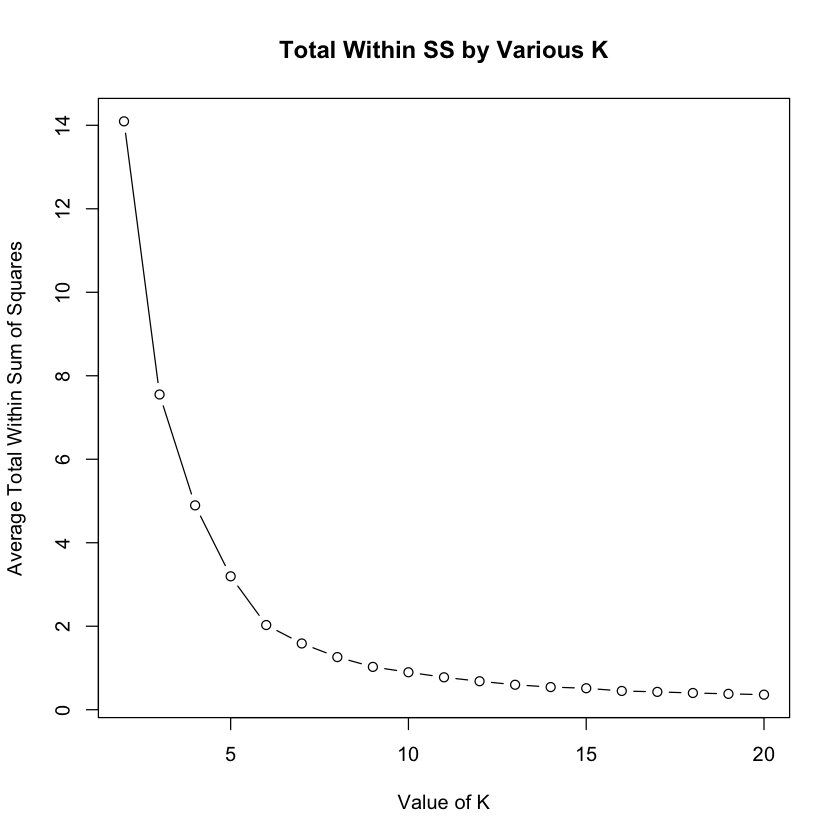

In [14]:
rng<-2:20 #K from 2 to 20
tries <-100 #Run the K Means algorithm 100 times
avg.totw.ss <-integer(length(rng)) #Set up an empty vector to hold all of points
for(v in rng){ # For each value of the range variable
 v.totw.ss <-integer(tries) #Set up an empty vector to hold the 100 tries
 for(i in 1:tries){
 k.temp <-kmeans(data,centers=v) #Run kmeans
 v.totw.ss[i] <-k.temp$tot.withinss#Store the total withinss
 }
 avg.totw.ss[v-1] <-mean(v.totw.ss) #Average the 100 total withinss
}
plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K",
 ylab="Average Total Within Sum of Squares",
 xlab="Value of K")

[1] http://www.statmethods.net/advstats/cluster.html
[2] http://www.learnbymarketing.com/tutorials/k-means-clustering-in-r-example/